<a href="https://colab.research.google.com/github/Yuan325/CSCI6364_MachineLearning/blob/main/Project2/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [ ]:
from google.colab import files

files.upload() # upload breastcancer.csv data file 

In [ ]:
# functions to print graphs

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

def printScatterplot(x1, x2, name1="Data 1", name2 = "Data 2"):
  plt.style.use('seaborn-whitegrid')
  plt.plot(x1, x2, 'o')
  plt.xlabel(name1)
  plt.ylabel(name2)
  plt.show()

def printHistogram(x, name = "Data"):
  q25, q75 = np.percentile(x,[25,75])
  bin_width = 2*(q75 - q25)*len(x)**(-1/3)
  bins = round((np.amax(x) - np.amin(x))/bin_width)
  print("Freedman–Diaconis number of bins:", bins)

  plt.style.use('seaborn-whitegrid')
  plt.hist(x, density = True, bins = bins, label=name) # density false make counts, true make probability
  mn, mx = plt.xlim()
  plt.xlim(mn, mx)
  kde_xs = np.linspace(mn, mx, 1000)
  kde = st.gaussian_kde(x)
  plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
  plt.legend(loc="upper right")
  plt.ylabel('Probability')
  plt.xlabel(name)
  plt.title("Histogram")
  plt.show()

def printScatterWithClass(x1, x2, y, name1="Data 1", name2="Data2"):
  x1_class1 = []
  x1_class2 = []
  x2_class1 = []
  x2_class2 = []
  for i in range(len(y)):
    if y[i] == -1:
      x1_class1.append(x1[i])
      x2_class1.append(x2[i])
    else:
      x1_class2.append(x1[i])
      x2_class2.append(x2[i])
  plt.style.use('seaborn-whitegrid')
  plt.scatter(x1_class1, x2_class1, c = 'orange', marker="o", label="Benign")
  plt.scatter(x1_class2, x2_class2, c = 'purple', marker="o", label="Malignant")
  plt.legend(loc="upper left")
  plt.xlabel(name1)
  plt.ylabel(name2)
  plt.show()

In [ ]:
import csv
import numpy as np

reader = csv.reader(open('/content/breastcancer.csv', 'r'))
header = next(reader)
data = []
for row in reader: 
  data.append(row)
data = np.array(data)

header = header[1:-1]
data = data[:, 1:]
np.random.shuffle(data)

data_y = []
for d in data[:, 0]:
  if d == "M":
    data_y.append(1.)
  else:
    data_y.append(-1.)
data_y = np.array(data_y)

data = data[:, 1:].astype(np.float)

# 569 dataset
split = 455 # 80/10/10 split
split2 = 512 # 57 data for validation and test
train_x = data[:split]
train_y = data_y[:split]

val_x = data[split:split2]
val_y = data_y[split:split2]

test_x = data[split2:]
test_y = data_y[split2:]

# normalization
min = []
max = []
for i in range(len(train_x[0])):
  min.append(np.amin(train_x[:,i]))
  max.append(np.amax(train_x[:,i]))

for i in range(len(min)):
  train_x[:,i]=(train_x[:,i] - min[i]) / (max[i]-min[i])
  val_x[:,i]=(val_x[:,i] - min[i]) / (max[i]-min[i])
  test_x[:,i]=(test_x[:,i] - min[i]) / (max[i]-min[i])

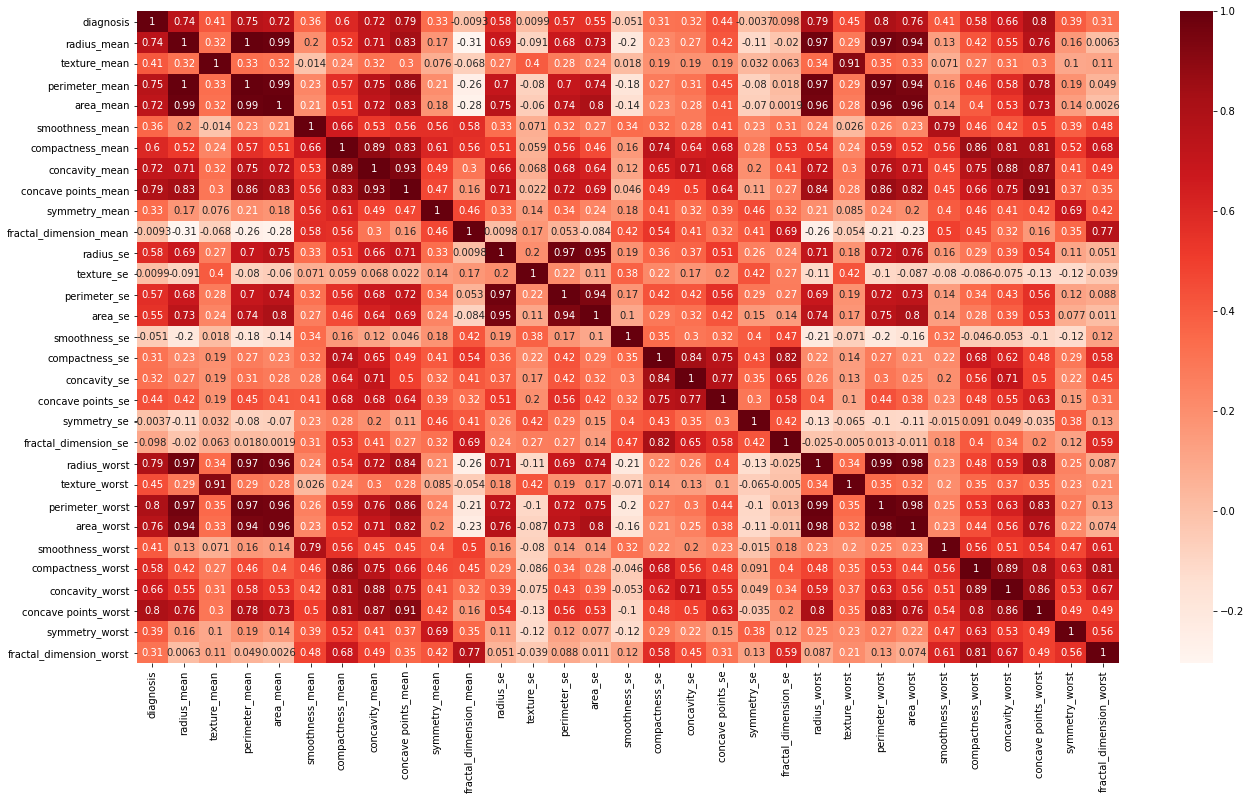

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data = np.column_stack((train_y, train_x))

# heatmap for Pearson Correlation for training data
df = pd.DataFrame(train_data, columns = header)
plt.figure(figsize=(22, 12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

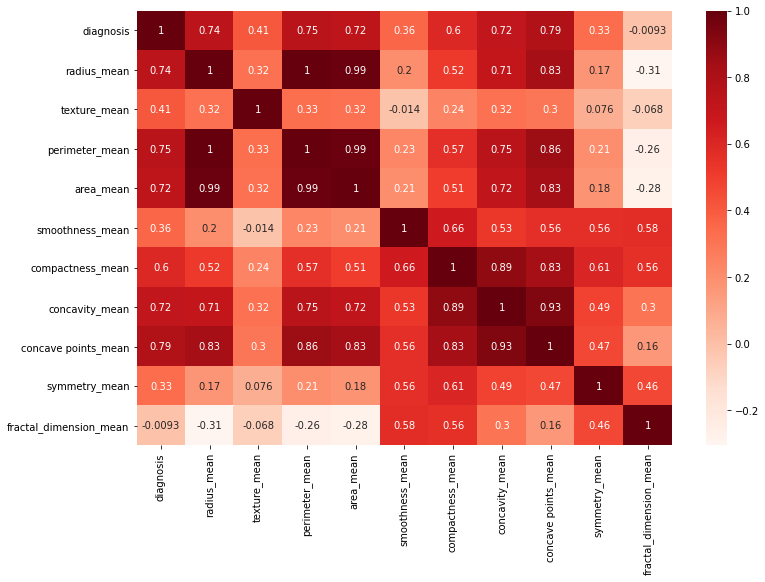

In [ ]:
# removing se and worst since those are highly correlated with mean
train_data = train_data[:, 0:11]
header = header[0:11]

train_x = train_x[:, 0:10]
val_x = val_x[:, 0:10]
test_x = test_x[:, 0:10]

# heatmap for Pearson Correlation for training data
df = pd.DataFrame(train_data, columns = header)
plt.figure(figsize=(12, 8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

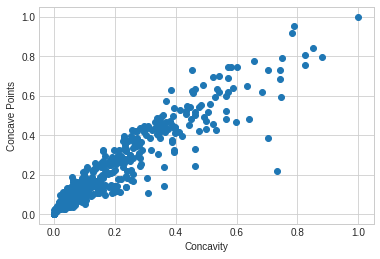

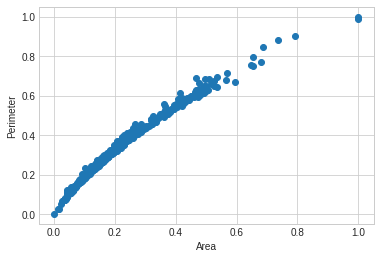

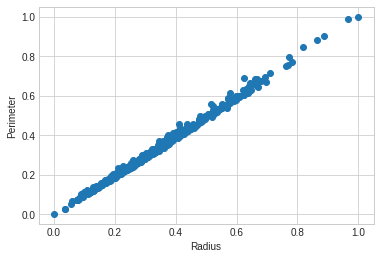

In [ ]:
printScatterplot(train_data[:,7], train_data[:,8], "Concavity", "Concave Points")
printScatterplot(train_data[:,4], train_data[:,3], "Area", "Perimeter")
printScatterplot(train_data[:,1], train_data[:,3], "Radius", "Perimeter")

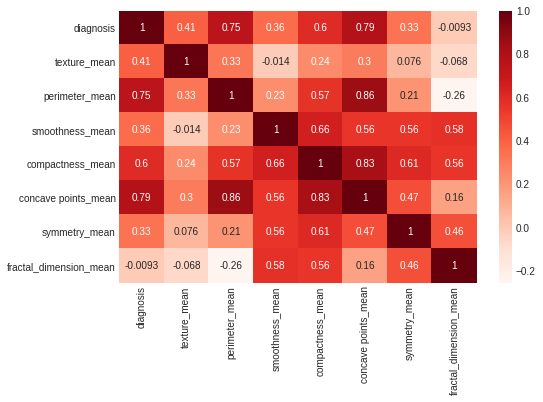

In [ ]:
# remove concavity, compactness, area and radius
train_data = np.delete(train_data,7, 1)
train_data = np.delete(train_data,4 ,1)
train_data = np.delete(train_data,1 ,1)
header = np.delete(header, 7, 0)
header = np.delete(header, 4, 0)
header = np.delete(header, 1, 0)

train_x = np.delete(train_x, 6, 1)
train_x = np.delete(train_x, 3, 1)
train_x = np.delete(train_x, 0, 1)
val_x = np.delete(val_x, 6, 1)
val_x = np.delete(val_x, 3, 1)
val_x = np.delete(val_x, 0, 1)
test_x = np.delete(test_x, 6, 1)
test_x = np.delete(test_x, 3, 1)
test_x = np.delete(test_x, 0, 1)

# heatmap for Pearson Correlation for training data
df = pd.DataFrame(train_data, columns = header)
plt.figure(figsize=(8, 5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Freedman–Diaconis number of bins: 21


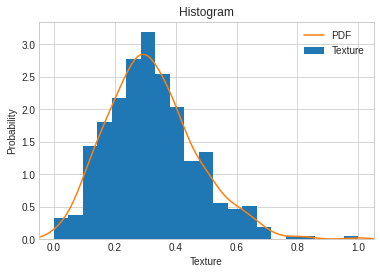

Freedman–Diaconis number of bins: 19


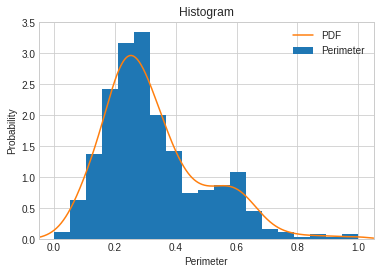

Freedman–Diaconis number of bins: 22


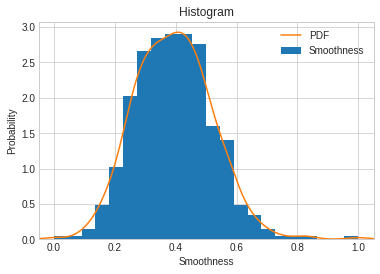

Freedman–Diaconis number of bins: 19


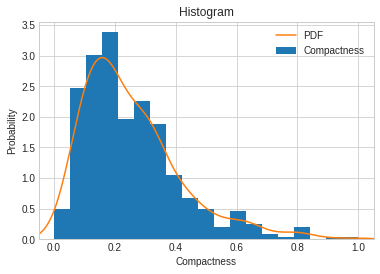

Freedman–Diaconis number of bins: 14


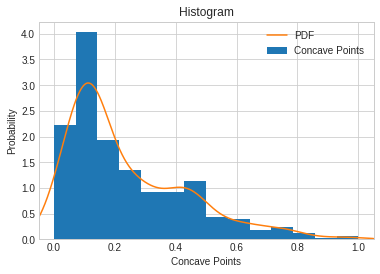

Freedman–Diaconis number of bins: 23


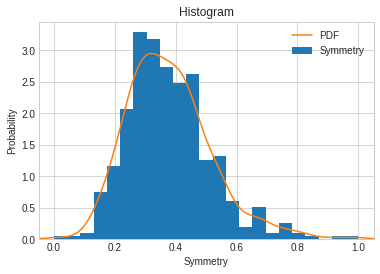

Freedman–Diaconis number of bins: 22


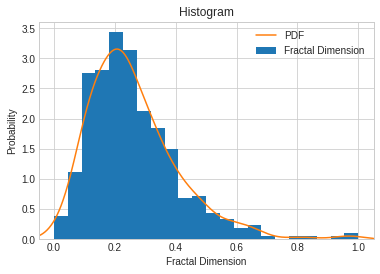

In [ ]:
# data visualization
printHistogram(train_x[:,0], "Texture")
printHistogram(train_x[:,1], "Perimeter")
printHistogram(train_x[:,2], "Smoothness")
printHistogram(train_x[:,3], "Compactness")
printHistogram(train_x[:,4], "Concave Points")
printHistogram(train_x[:,5], "Symmetry")
printHistogram(train_x[:,6], "Fractal Dimension")



In [ ]:
# evaluation functions
def confusionMatrix(y, yhat):
  tn = fp = fn = tp = 0
  for y_val, yhat_val in zip(y, yhat):
    if y_val == 1 and yhat_val == 1:
      tp += 1
    elif y_val == 1 and yhat_val != 1:
      fn += 1
    elif y_val != 1 and yhat_val == 1:
      fp += 1
    else:
      tn += 1
  return tn, fp, fn, tp

def accuracy(tn, fp, fn, tp):
  return (tp + tn)/(tp+tn+fp+fn)

def sensitivity(tn, fp, fn, tp):
  return tp/(tp+fn)

def specificity(tn, fp, fn, tp):
  return tn/(tn+fp)

def pos_pred_val(tn, fp, fn, tp):
  return tp/(tp+fp)

def false_positive_rate(tn, fp, fn, tp):
  return fp/(tn+fp)

def eval(test_x, test_y, w):
  pred = predict(test_x, w)
  tn, fp, fn, tp = confusionMatrix(test_y, pred)
  acc = accuracy(tn, fp, fn, tp)
  sen = sensitivity(tn, fp, fn, tp)
  spec = specificity(tn, fp, fn, tp)
  ppv = pos_pred_val(tn, fp, fn, tp)
  fpr = false_positive_rate(tn, fp, fn, tp)

  print("\n\nxxx RESULTS xxx")
  print("TP: ", tp, "\nFP: ", fp, "\nTN: ", tn, "\nFN: ", fn)
  print("Accuracy: ", acc)
  print("Sensitivity: ", sen)
  print("Specificity: ", spec)
  print("Positive Predictive Value: ", ppv)
  print("False Postive Rate: ", fpr)
  return pred


# svm
def fit(train_x, train_y, learning_rate, epoch, c): 
  train_x = np.append(train_x, np.ones([len(train_x), 1]), 1) # append an extra column for bias
  w = np.zeros(len(train_x[0])) # bias and weight were combined into a single matrix
  for i in range(1, epoch + 1):
    # shuffle x and y
    rand = np.arange(len(train_x))
    np.random.shuffle(rand)
    train_x = train_x[rand]
    train_y = train_y[rand]
    # stochastic gradient descent
    for x, y in zip(train_x, train_y):
      dist = 1 - y * np.dot(x, w)
      if dist <= 0:
        dw = w
      else:
        dw = w - (c * y * x)
      w = w - learning_rate * dw
  return w

def predict(xs, w):
  xs = np.append(xs, np.ones([len(xs), 1]), 1) # append an extra column for bias (variable 'w' includes both weights and bias)
  yhat = np.zeros(len(xs))
  for i, x in enumerate(xs):
    y = np.sign(np.dot(w, x))
    yhat[i] = y
  return yhat

def svm(train_x, train_y, val_x, val_y, lr, epoch, cs):
  accs = []
  ws = []
  best_acc = -1
  best_c = -1
  for ind, c in enumerate(cs): 
    w = fit(train_x, train_y, lr, epoch, c)
    ws.append(w)
    pred = predict(val_x, w)
    tn, fp, fn, tp = confusionMatrix(val_y, pred)
    acc = accuracy(tn, fp, fn, tp) * 100
    accs.append(acc)
    if acc > best_acc:
      best_acc = acc
      best_c = ind
  print("Validation data shows best C value as: ", cs[best_c], " with accuracy of ", best_acc)
  return ws[best_c], accs, best_c

In [ ]:
cs = [0.1, 1, 10, 50, 80, 100]
w, accs, c_index = svm(train_x, train_y, val_x, val_y, 0.0001, 3000, cs)
pred = eval(test_x, test_y, w)

Validation data shows best C value as:  80  with accuracy of  96.49122807017544


xxx RESULTS xxx
TP:  17 
FP:  0 
TN:  30 
FN:  10
Accuracy:  0.8245614035087719
Sensitivity:  0.6296296296296297
Specificity:  1.0
Positive Predictive Value:  1.0
False Postive Rate:  0.0


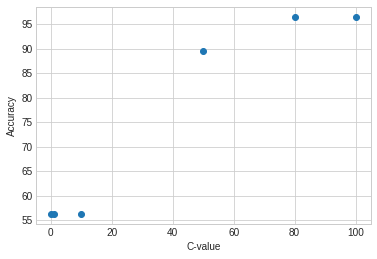

In [ ]:
printScatterplot(cs, accs, "C-value", "Accuracy")

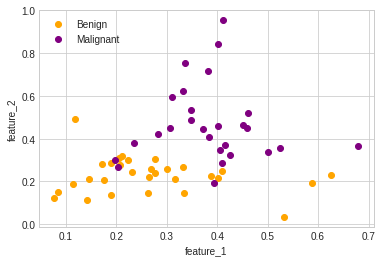

In [ ]:
# actual result for test data (axis as feature 1 (texture) and feature 2(perimeter))
printScatterWithClass(test_x[:,0], test_x[:,1], test_y, "feature_1", "feature_2")

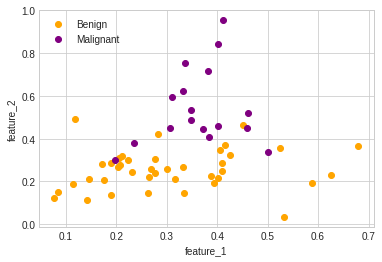

In [ ]:
# prediction result for test data (axis as feature 1 (texture) and feature 2(perimeter))
printScatterWithClass(test_x[:,0], test_x[:,1], pred, "feature_1", "feature_2")